> __Purpose:__ This NB takes forever to run. The functionality of this ended up being to create and plot the results, and then I saved the results so that I could use them in a fresh new NB without all this code and crazy run times.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import pickle
import random
from kcs_ml_infr import *
from experiment_params import *
from fl_sim_client import *
from fl_sim_server import *

import seaborn as sns
from presentation_sns_config import *

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model

#import warnings
#warnings.filterwarnings("ignore")

random.seed(a=1)

In [2]:
final_update = 16

## Load Data

In [3]:
path = r'C:\Users\kdmen\Desktop\Research\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
num_participants = 14

D_0 = np.random.rand(2,64)
D_0_7 = np.random.rand(2,7)
D_0_10 = np.random.rand(2,10)

## Plot Accuracy As a Func of N

In [4]:
lr_df = pd.read_pickle(r'Saved_Metrics\104P_full_lr_df.pkl')
knn_df = pd.read_pickle(r'Saved_Metrics\104P_full_knn_df.pkl')
svc_df = pd.read_pickle(r'Saved_Metrics\104P_full_svc_df.pkl')
dt_df = pd.read_pickle(r'Saved_Metrics\104P_full_dt_df.pkl')
gbt_df = pd.read_pickle(r'Saved_Metrics\104P_full_gbt_df.pkl')

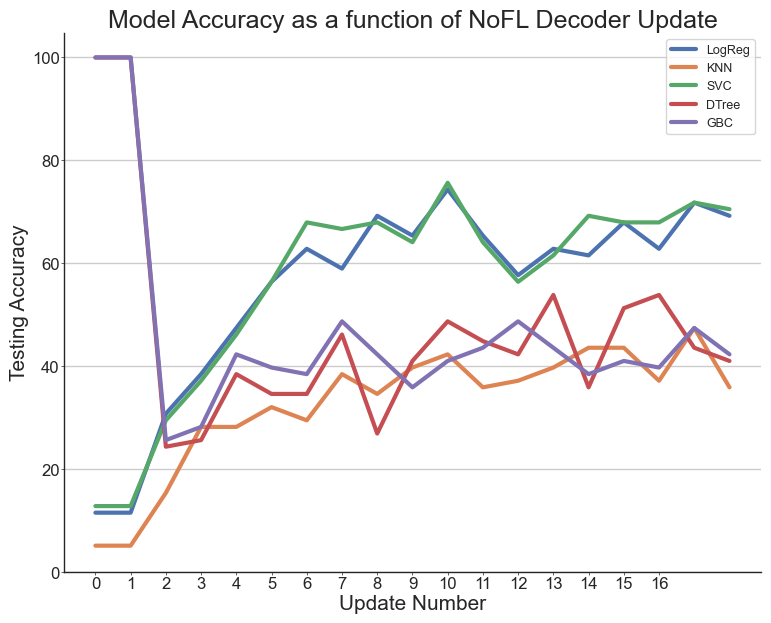

In [5]:
col_num = 1
my_x_updates = list(range(19))

plt.figure(figsize=(9,7))
plt.plot(my_x_updates, lr_df.iloc[:, col_num], label='LogReg')
plt.plot(my_x_updates, knn_df.iloc[:, col_num], label='KNN')
plt.plot(my_x_updates, svc_df.iloc[:, col_num], label='SVC')
plt.plot(my_x_updates, dt_df.iloc[:, col_num], label='DTree')
plt.plot(my_x_updates, gbt_df.iloc[:, col_num], label='GBC')
plt.xticks(np.arange(0, final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Model Accuracy as a function of NoFL Decoder Update')
plt.legend(loc='best')
plt.show()

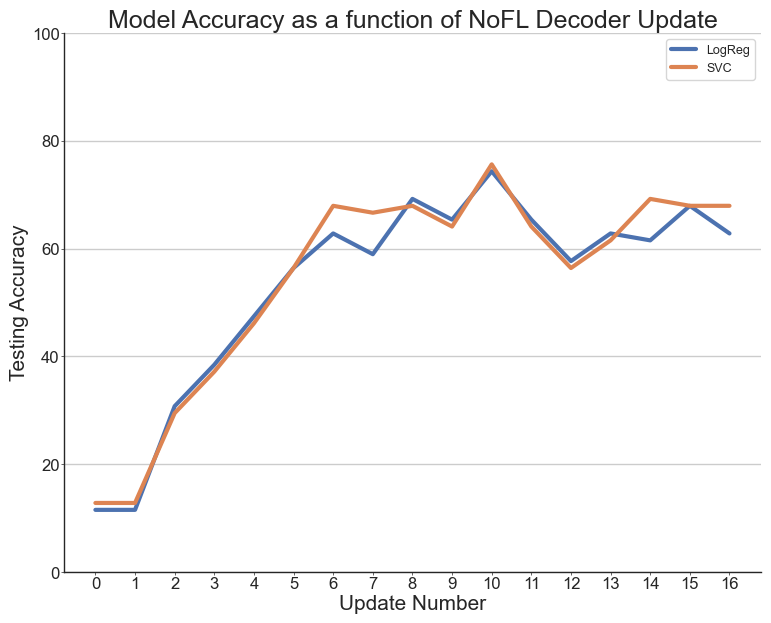

In [6]:
col_num = 1
my_x_updates = list(range(19))
start = 0
stop = 17

plt.figure(figsize=(9,7))
plt.plot(my_x_updates[start:stop], lr_df.iloc[start:stop, col_num], label='LogReg')
#plt.plot(my_x_updates[start:stop], knn_df.iloc[start:stop, col_num], label='KNN')
plt.plot(my_x_updates[start:stop], svc_df.iloc[start:stop, col_num], label='SVC')
#plt.plot(my_x_updates[start:stop], dt_df.iloc[start:stop, col_num], label='DTree')
#plt.plot(my_x_updates[start:stop], gbt_df.iloc[start:stop, col_num], label='GBC')
plt.xticks(np.arange(0, final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Model Accuracy as a function of NoFL Decoder Update')
plt.legend(loc='best')
plt.show()

## 1 Scipy Step (FL)

In [7]:
#df = pd.read_pickle('data.pkl')
lr_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_bad_lr_df.pkl")
knn_df_1ss = pd.read_pickle(r"Saved_Metrics\3004P_good_knn_df.pkl")
svc_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_bad_svc_df.pkl")
dt_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_good_dt_df.pkl")
gbt_df_1ss = pd.read_pickle(r"Saved_Metrics\3004P_good_gbt_df.pkl")

In [8]:
lr_df_1ss.head()

,Algorithm,Test Acc,N
0,LogisticRegression(),20.238,0
0,LogisticRegression(),28.869,1
0,LogisticRegression(),20.089,2
0,LogisticRegression(),20.238,3
0,LogisticRegression(),26.488,4


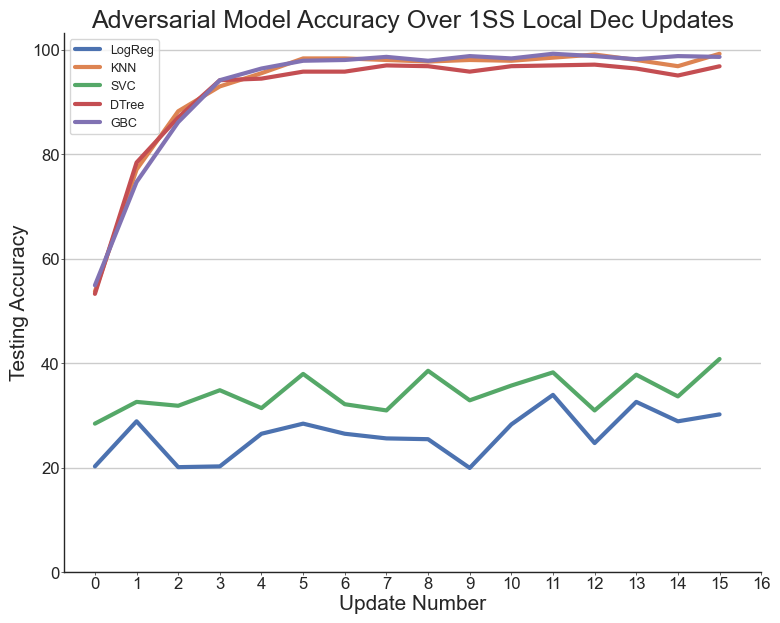

In [9]:
plt.figure(figsize=(9,7))
plt.plot(my_x_updates[:stop-1], lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_x_updates[:stop-1], knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_x_updates[:stop-1], svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_x_updates[:stop-1], dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_x_updates[:stop-1], gbt_df_1ss.iloc[:, col_num], label='GBC')
plt.xticks(np.arange(0, final_update+1, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Local Dec Updates')
plt.legend(loc='best')
plt.show()

# Global Model Privacy Analysis

In [10]:
#df = pd.read_pickle('data.pkl')
global_lr_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_global_lr_df.pkl")
global_knn_df_1ss = pd.read_pickle(r"Saved_Metrics\3004P_global_knn_df.pkl")
global_svc_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_global_svc_df.pkl")
global_dt_df_1ss = pd.read_pickle(r"Saved_Metrics\300P_global_dt_df.pkl")
global_gbt_df_1ss = pd.read_pickle(r"Saved_Metrics\3004P_global_gbt_df.pkl")


In [11]:
global_lr_df_1ss.head()

,Algorithm,Test Acc,N
0,LogisticRegression(),7.738,0
0,LogisticRegression(),7.887,1
0,LogisticRegression(),7.887,2
0,LogisticRegression(),8.185,3
0,LogisticRegression(),10.417,4


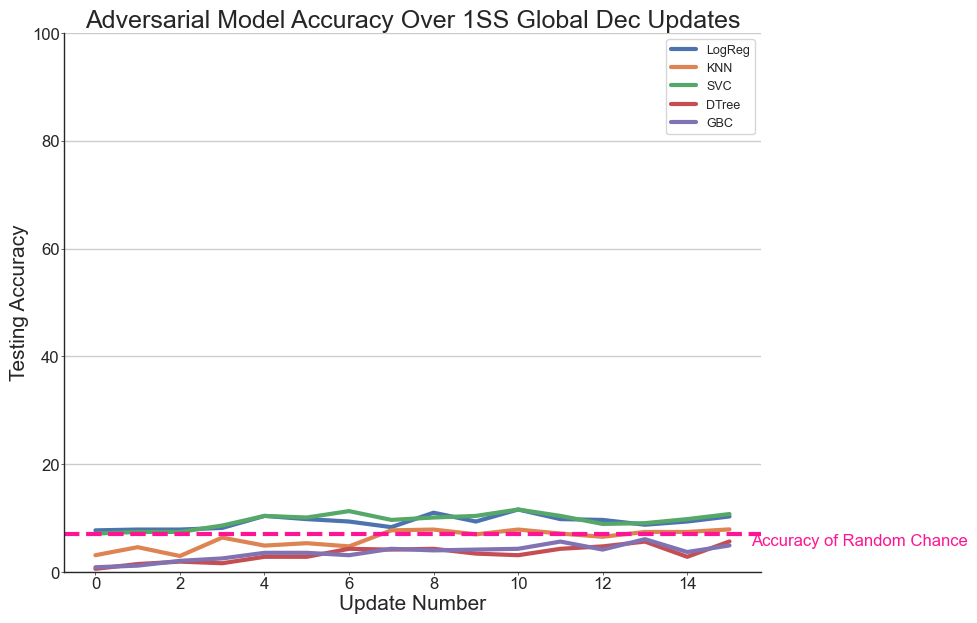

In [12]:
col_num = 1  # Test Acc column

my_global_x_updates = my_x_updates[:stop-1]

plt.figure(figsize=(9,7))
plt.plot(my_global_x_updates, global_lr_df_1ss.iloc[:, col_num], label='LogReg')
plt.plot(my_global_x_updates, global_knn_df_1ss.iloc[:, col_num], label='KNN')
plt.plot(my_global_x_updates, global_svc_df_1ss.iloc[:, col_num], label='SVC')
plt.plot(my_global_x_updates, global_dt_df_1ss.iloc[:, col_num], label='DTree')
plt.plot(my_global_x_updates, global_gbt_df_1ss.iloc[:, col_num], label='GBC')

plt.axhline(7.14, linestyle='dashed', color='deeppink')
plt.text(15.5,5,'Accuracy of Random Chance', color='deeppink')

#plt.xticks(np.arange(global_present_updates[0], 19, 1.0))
plt.yticks(np.arange(0, 120, 20.0))
plt.grid(axis='y')
plt.xlabel('Update Number')
plt.ylabel('Testing Accuracy')
plt.title('Adversarial Model Accuracy Over 1SS Global Dec Updates')
plt.legend(loc='best')
plt.show()

## Paper Version

## Presentation Version

In [13]:
stop = 16

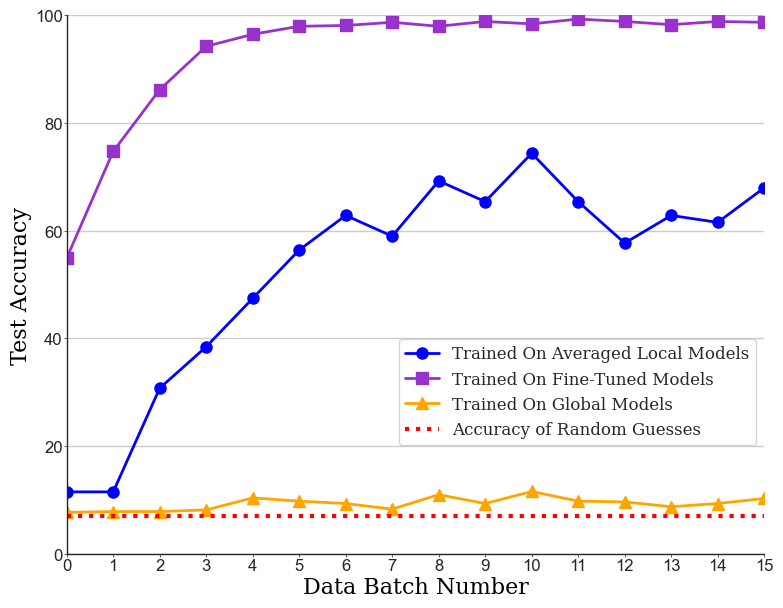

<Figure size 900x700 with 0 Axes>

In [14]:
fl_x_updates = list(range(19))
fig, ax1 = plt.subplots(figsize=(9,7))
marker_size = 8
my_line_width = 2

#sns.set(style='whitegrid', context='paper', font_scale=2)

plt.figure(figsize=(9,7))
ax1.plot(fl_x_updates[:stop], lr_df.iloc[:stop, col_num], linewidth=my_line_width, marker='o', markersize=marker_size, color='blue', label='Trained On Averaged Local Models')
ax1.plot(fl_x_updates[:stop], gbt_df_1ss.iloc[:stop, col_num], linewidth=my_line_width, marker='s', markersize=marker_size, color='darkorchid', label='Trained On Fine-Tuned Models')
ax1.plot(fl_x_updates[:stop], global_lr_df_1ss.iloc[:stop, col_num], marker='^', markersize=marker_size, color='orange', linewidth=my_line_width, label='Trained On Global Models')

axes_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 16}
title_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 22}
ticks_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 6}

ax1.set_xticks(np.arange(0, stop, 1.0))#, fontdict=ticks_font)
ax1.set_yticks(np.arange(0, 120, 20.0))#, fontdict=ticks_font)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, 15)
ax1.grid(axis='y')
ax1.set_xlabel('Data Batch Number', fontdict=axes_font)
ax1.set_ylabel('Test Accuracy', fontdict=axes_font)
#ax1.set_title('Adversarial Model Accuracy Per Data Batch', fontdict=title_font)

ax1.axhline(7.14, linestyle='dotted', color='red', label='Accuracy of Random Guesses')

# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
#ax1.legend(loc='center right', bbox_to_anchor=(1, 0.315))
legend_font = {'family': 'serif', 'size': 12}
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.415), prop=legend_font)

ax1.spines[['top']].set_visible(False)

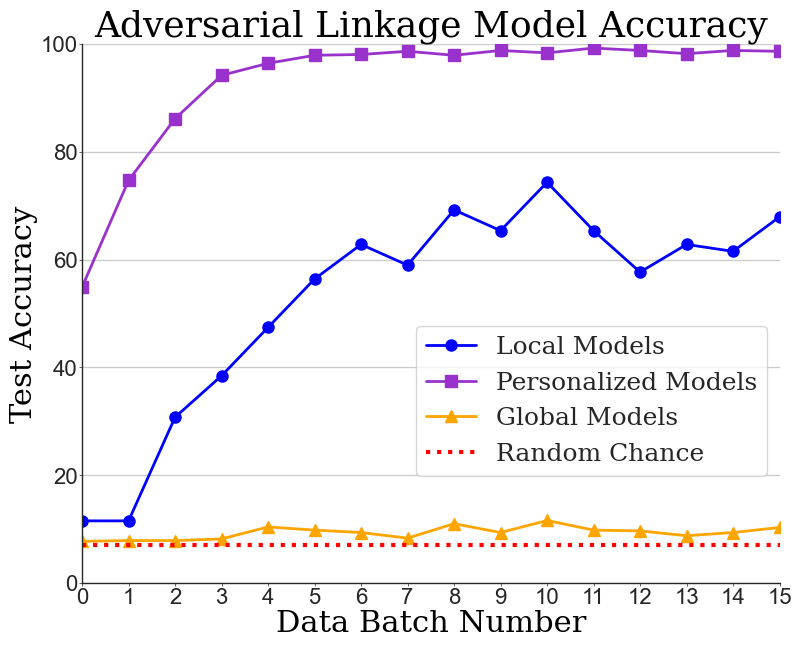

<Figure size 900x700 with 0 Axes>

In [15]:
fl_x_updates = list(range(19))
fig, ax1 = plt.subplots(figsize=(9,7))
marker_size = 8
my_line_width = 2

#sns.set(style='whitegrid', context='paper', font_scale=2)

plt.figure(figsize=(9,7))
ax1.plot(fl_x_updates[:stop], lr_df.iloc[:stop, col_num], linewidth=my_line_width, marker='o', markersize=marker_size, color='blue', label='Local Models')
ax1.plot(fl_x_updates[:stop], gbt_df_1ss.iloc[:stop, col_num], linewidth=my_line_width, marker='s', markersize=marker_size, color='darkorchid', label='Personalized Models')
ax1.plot(fl_x_updates[:stop], global_lr_df_1ss.iloc[:stop, col_num], marker='^', markersize=marker_size, color='orange', linewidth=my_line_width, label='Global Models')

ticks_font_size = 16
axes_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 22}
title_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': 26}
ticks_font = {'family': 'serif', 'color':  'black', 'weight': 'normal', 'size': ticks_font_size}
legend_font = {'family': 'serif', 'size': 18}

ax1.set_xticks(np.arange(0, stop, 1.0))
ax1.set_yticks(np.arange(0, 120, 20.0))
ax1.xaxis.set_tick_params(labelsize=ticks_font_size)
ax1.yaxis.set_tick_params(labelsize=ticks_font_size)
ax1.set_ylim(0, 100)
ax1.set_xlim(0, 15)
ax1.grid(axis='y')
ax1.set_xlabel('Data Batch Number', fontdict=axes_font)
ax1.set_ylabel('Test Accuracy', fontdict=axes_font)
#ax1.set_title('Adversarial Model Accuracy Per Data Batch', fontdict=title_font)

ax1.axhline(7.14, linestyle='dotted', color='red', label='Random Chance')

# use parameter bbox_to_anchor to reposition
# the legend box outside the plot area
#ax1.legend(loc='center right', bbox_to_anchor=(1, 0.315))
ax1.legend(loc='upper right', bbox_to_anchor=(1, 0.5), prop=legend_font)

ax1.set_title("Adversarial Linkage Model Accuracy", fontdict=title_font)

ax1.spines[['top']].set_visible(False)